In [58]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
samples = []
with open('../markers/human_markers.m', 'rb') as file_stream:
    while True:
        try:
            samples.append(pickle.load(file_stream))
        except EOFError:
            break

In [60]:
angles = list(samples[0].keys())
generated_inputs = set()
for i in range(len(samples)):
    vector = []
    for j in range(len(angles)):
        vector.append(int(samples[i][angles[j]]))
    generated_inputs.add(tuple(vector))
input_array = np.array(list(generated_inputs))
print(input_array.shape)

(15284, 5)


In [61]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(input_array)
print(pca.explained_variance_ratio_)  

[0.43670064 0.35766393]


## 50 clusters

In [90]:
kmeans = KMeans(n_clusters=50, max_iter=2000, n_init=100)
kmeans.fit(input_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=50, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

-12188889.644115886


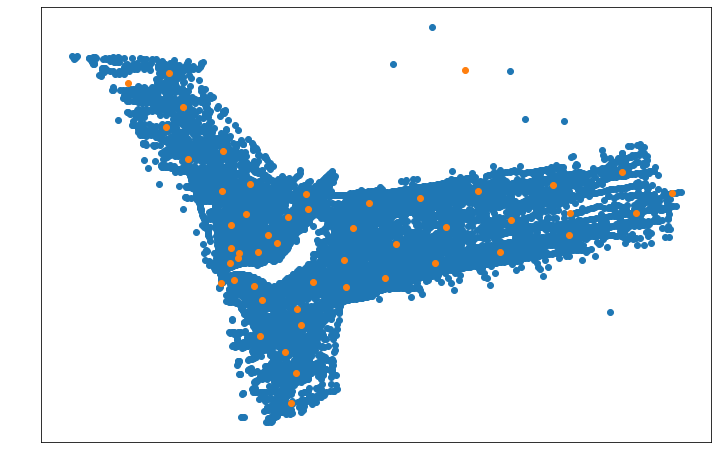

In [91]:
print(kmeans.score(input_array))
clusters_centers = pca.transform(kmeans.cluster_centers_)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()
ax.scatter(reduced_data[:, 0], reduced_data[:, 1])
ax.scatter(clusters_centers[:, 0], clusters_centers[:, 1])
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

In [92]:
with open("../clusters/human50_cluster.c", "wb") as file_stream: 
    pickle.dump(angles, file_stream)
    pickle.dump(kmeans, file_stream)

## 100 clusters

In [93]:
kmeans = KMeans(n_clusters=100, max_iter=2000, n_init=100)
kmeans.fit(input_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=100, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

-6448739.941796639


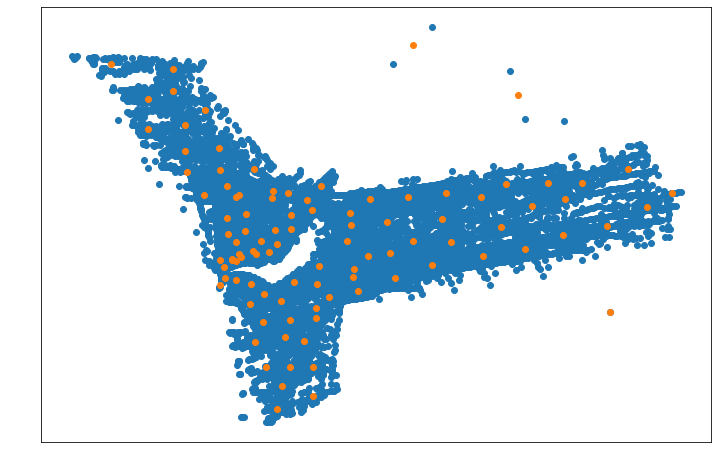

In [94]:
print(kmeans.score(input_array))
clusters_centers = pca.transform(kmeans.cluster_centers_)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()
ax.scatter(reduced_data[:, 0], reduced_data[:, 1])
ax.scatter(clusters_centers[:, 0], clusters_centers[:, 1])
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

In [95]:
with open("../clusters/human100_cluster.c", "wb") as file_stream: 
    pickle.dump(angles, file_stream)
    pickle.dump(kmeans, file_stream)

## 200 clusters

In [96]:
kmeans = KMeans(n_clusters=200, max_iter=2000, n_init=100)
kmeans.fit(input_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=200, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

-3600190.1913666306


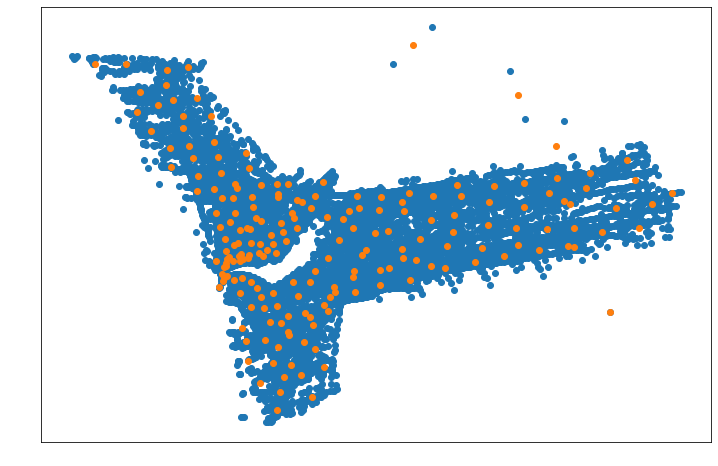

In [97]:
print(kmeans.score(input_array))
clusters_centers = pca.transform(kmeans.cluster_centers_)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()
ax.scatter(reduced_data[:, 0], reduced_data[:, 1])
ax.scatter(clusters_centers[:, 0], clusters_centers[:, 1])
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

In [98]:
with open("../clusters/human200_cluster.c", "wb") as file_stream: 
    pickle.dump(angles, file_stream)
    pickle.dump(kmeans, file_stream)